#**Toxic Tweets Dataset**

# Importing the data

In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv("FinalBalancedDataset.csv")
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


Reviewing the balanceness of data

In [3]:
df['Toxicity'].value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
56740    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741    you've gone and broke the wrong heart baby, an...
56742    young buck wanna eat!!.. dat nigguh like I ain...
56743                youu got wild bitches tellin you lies
56744    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 56745, dtype: object

Removing punctuations

In [7]:
df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z]", " ")

<ipython-input-7-538935149b69>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z]", " ")


In [8]:
df = df[['tweet','tweet_processed','Toxicity']]

In [9]:
df

,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...,0
2,bihday your majesty,bihday your majesty,0
3,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,factsguide society now motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie LifeAsKing ...,1
56741,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby an...,1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,1


converting to lowercase

In [10]:
df['tweet_processed'] = [row.lower() for row in df['tweet_processed']]

In [11]:
df['tweet_processed']

0          user when a father is dysfunctional and is s...
1         user  user thanks for  lyft credit i can t us...
2                                      bihday your majesty
3         model   i love u take with u all the time in ...
4                   factsguide  society now     motivation
                               ...                        
56740    you s a muthaf   in lie         lifeasking    ...
56741    you ve gone and broke the wrong heart baby  an...
56742    young buck wanna eat     dat nigguh like i ain...
56743                youu got wild bitches tellin you lies
56744      ruffled   ntac eileen dahlia   beautiful col...
Name: tweet_processed, Length: 56745, dtype: object

## Removing Stopwords

In [12]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['user','rt','amp','go','want','time','day','one','look','new','even','video','today','t','p','c','zu','u','co','pa','us','ur','sta','ve','te','say','try','sunday','use','music','bihday','put','two','guy','gon','w','monday','read','p','ok','ok','fathersday','gt','via','na','twitter','saturday','polar bear','way','n','may','im','b','post','ye','hea','forex','summer','make','see','weekend','back','tweet','hoe','someone','game','much','many','dont','cuz','pay','give','wit','make','bro','wan','da','lil','em','tho','aint','still','tf','oh','ta','yo','nah','ho','stfu','tryna','nig','kieffer','jason']
# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(twe):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    tweet_tokenized = word_tokenize(twe)
    twe_new = " ".join([i for i in tweet_tokenized  if i not in stop_words])
    return twe_new

# Removing stopwords
df['tweet_processed'] = [remove_stopwords(r) for r in df['tweet_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
df['tweet_processed']

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit cause offer wheelchair vans...
2                                                  majesty
3                                          model love take
4                            factsguide society motivation
                               ...                        
56740    muthaf lie lifeasking pearls corey emanuel rig...
56741      gone broke wrong heart baby drove redneck crazy
56742            young buck eat dat nigguh like fuckin dis
56743                    youu got wild bitches tellin lies
56744    ruffled ntac eileen dahlia beautiful color com...
Name: tweet_processed, Length: 56745, dtype: object

## Lemmatization

In [14]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['tweet_processed'] = df['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [15]:
df['tweet_processed']

0        father dysfunctional selfish drag kid dysfunct...
1        thanks lyft credit cause offer wheelchair van ...
2                                                  majesty
3                                          model love take
4                            factsguide society motivation
                               ...                        
56740    muthaf lie lifeasking pearl corey emanuel righ...
56741        go break wrong heart baby drive redneck crazy
56742            young buck eat dat nigguh like fuckin dis
56743                       youu get wild bitch tellin lie
56744    ruffle ntac eileen dahlia beautiful color comb...
Name: tweet_processed, Length: 56745, dtype: object

visualizing the words in worldcloud form

NON TOXIC DATA

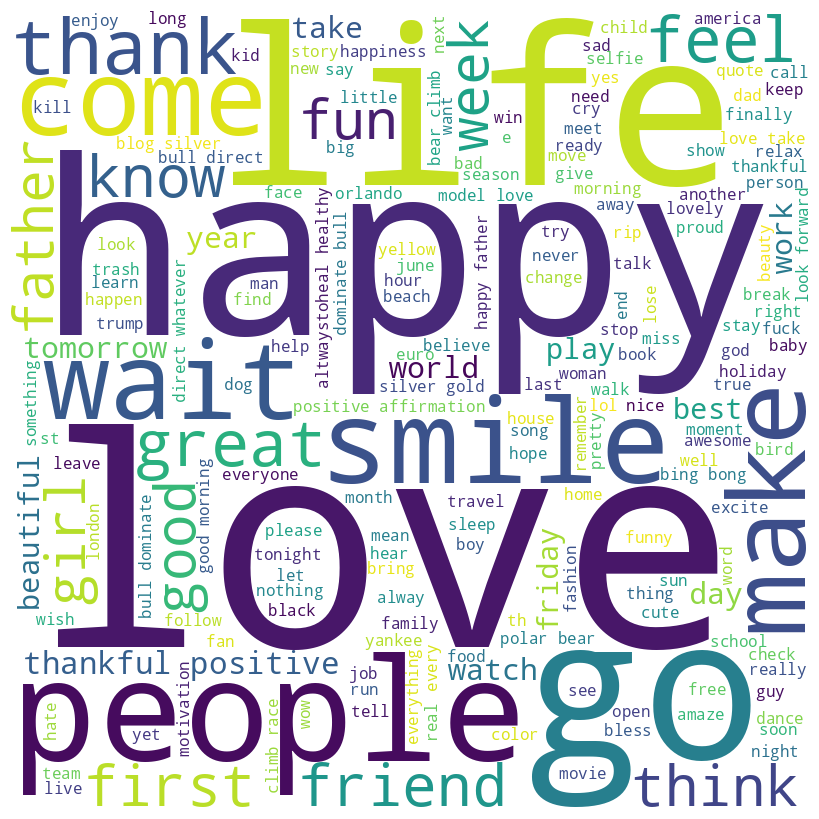

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Toxicity'] == 0,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

TOXIC DATA

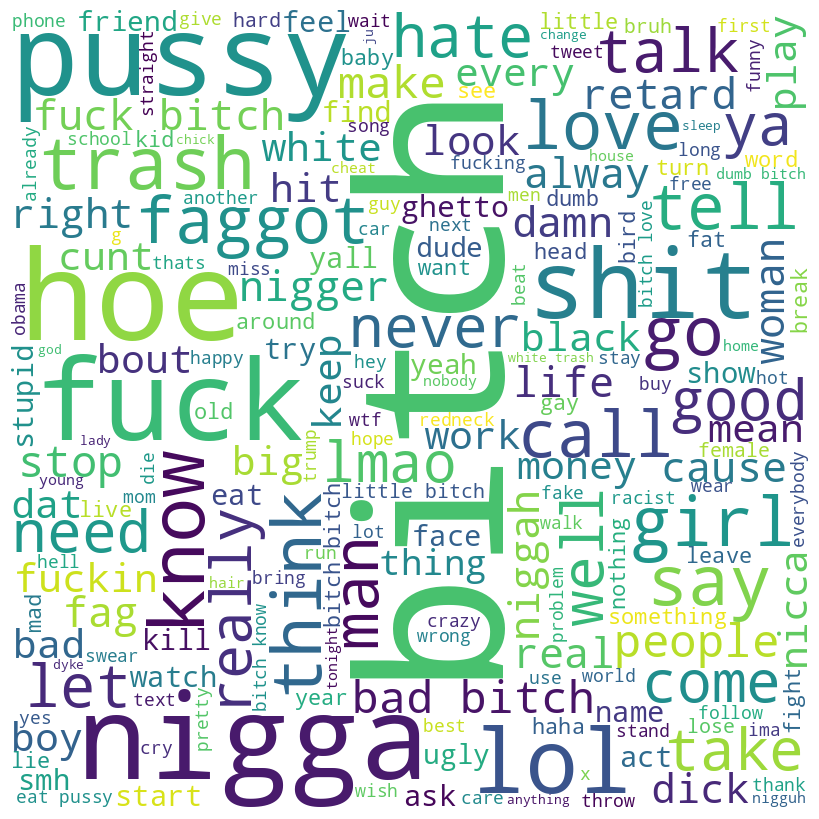

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Toxicity'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [18]:
df

,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,0
1,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause offer wheelchair van ...,0
2,bihday your majesty,majesty,0
3,#model i love u take with u all the time in ...,model love take,0
4,factsguide: society now #motivation,factsguide society motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking pearl corey emanuel righ...,1
56741,"you've gone and broke the wrong heart baby, an...",go break wrong heart baby drive redneck crazy,1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck eat dat nigguh like fuckin dis,1
56743,youu got wild bitches tellin you lies,youu get wild bitch tellin lie,1


In [19]:
tweet = df['tweet_processed']
labels = df['Toxicity']

# Bag of Words
# TF-IDF

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Bag of Words
bvectorizer = CountVectorizer()
X_bow = bvectorizer.fit_transform(tweet)

# Create the CountVectorizer with a minimum document frequency threshold
# bvectorizer = CountVectorizer(min_df=2)  # Only include words that appear in at least 5 documents
# X_bow = bvectorizer.fit_transform(tweet)

# TF-IDF
tvectorizer = TfidfVectorizer()
X_tfidf = tvectorizer.fit_transform(tweet)
# tvectorizer = TfidfVectorizer(min_df=2)
# X_tfidf = tvectorizer.fit_transform(tweet)

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf,y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)




In [21]:
# df_bow = pd.DataFrame(X_bow.todense(),columns = sorted(bvectorizer.vocabulary_))
# df_bow

In [22]:
df['tweet_processed'].shape

(56745,)

In [23]:
X_train_bow.shape

(45396, 57710)

In [24]:
y_train.shape

(45396,)

In [25]:
X_test_bow.shape

(11349, 57710)

In [26]:
X_train_tfidf.shape

(45396, 57710)

## DECISION TREES FOR BAG OF WORD

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,30),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(X_train_bow, y_train)

rcv.best_score_

0.9039342827167001

In [28]:
rcv.best_params_

{'splitter': 'best', 'max_depth': 29, 'criterion': 'gini'}

In [29]:
finalmodel_dtc = model.set_params(**rcv.best_params_)
finalmodel_dtc.fit(X_train_bow, y_train)
preds_bow = finalmodel_dtc.predict(X_test_bow)

EVALAUTION

Precision: 0.9508704984497973
Recall: 0.8175107648144351
F1-score: 0.8791620727673649
Confusion Matrix:
[[6266  206]
 [ 890 3987]]
AUC: 0.9026173661947949


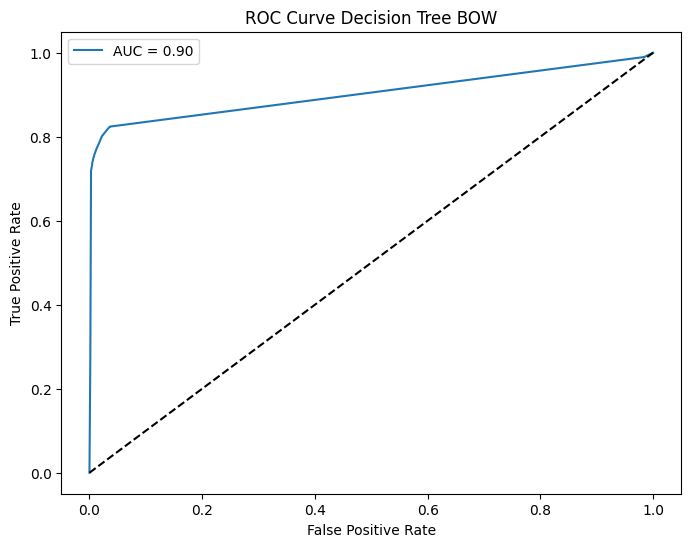

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, preds_bow)
recall = recall_score(y_test, preds_bow)
f1 = f1_score(y_test, preds_bow)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,preds_bow)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_dtb = finalmodel_dtc.predict_proba(X_test_bow)
fpr_dtb, tpr_dtb, thresholds_dtb = roc_curve(y_test_bin.ravel(), predict_proba_dtb[:, 1])
roc_auc = auc(fpr_dtb, tpr_dtb)
print("AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, preds_bow)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtb, tpr_dtb, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree BOW')
plt.legend()
plt.show()


## DECISION TREES FOR TF-IDF

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 50),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [ ]:
rcv.best_params_

{'splitter': 'best', 'max_depth': 44, 'criterion': 'gini'}

In [ ]:
rcv.best_score_

0.9090008278716131

In [ ]:
finalmodel_dttf = model.set_params(**rcv.best_params_)
finalmodel_dttf.fit(X_train_tfidf, y_train)
preds_tf = finalmodel_dttf.predict(X_test_tfidf)

EVALUATION

Precision: 0.9496958352831072
Recall: 0.8322739388968629
F1-score: 0.8871161621680691
Confusion Matrix:
[[6257  215]
 [ 818 4059]]
AUC: 0.9090005513886351


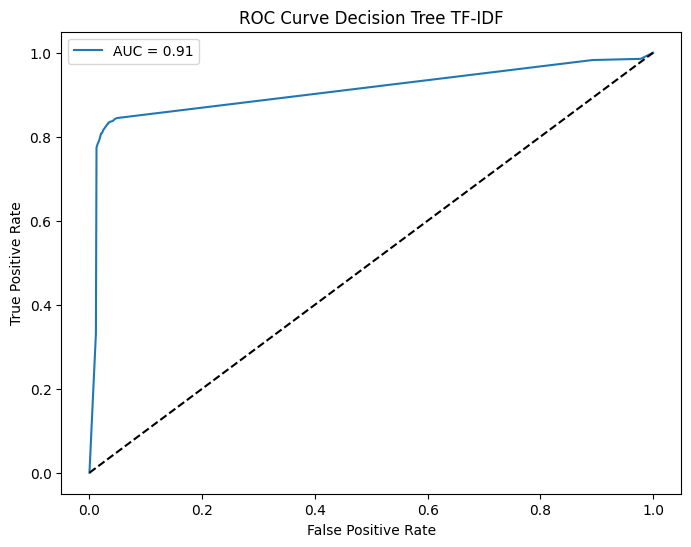

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, preds_tf)
recall = recall_score(y_test, preds_tf)
f1 = f1_score(y_test, preds_tf)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,preds_tf)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_dt = finalmodel_dttf.predict_proba(X_test_tfidf)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_bin.ravel(), predict_proba_dt[:, 1])
roc_auc = auc(fpr_dt, tpr_dt)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree TF-IDF')
plt.legend()
plt.show()


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# rf_bow = RandomForestClassifier()

# params = {'criterion':['gini','entropy'],
#           'n_estimators': range(1,10),
#           'max_features':['sqrt', 'log2', None]
#           # 'max_depth':range(3,50),
#           }



# skf = StratifiedKFold(n_splits = 10)

# rcv = RandomizedSearchCV(rf_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
# rcv.fit(X_train_bow, y_train)

In [ ]:
# rcv.best_params_

In [ ]:
# rcv.best_score_

In [ ]:
# finalmodel_rfc = rf_bow.set_params(**rcv.best_params_)
# finalmodel_rfc.fit(X_train_bow, y_train)
# rfcpreds_bow = finalmodel_rfc.predict(X_test_bow)

In [ ]:
# ## Evaluation
# # Calculate precision, recall, and F1-score
# precision = precision_score(y_test, rfcpreds_bow)
# recall = recall_score(y_test, rfcpreds_bow)
# f1 = f1_score(y_test, rfcpreds_bow)

# # Print precision, recall, and F1-score
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# # Calculate confusion matrix
# cm = confusion_matrix(y_test,rfcpreds_bow)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

# # AUROC
# auc_score = roc_auc_score(y_test, rfcpreds_bow)
# print('auc_score:',auc_score)

# fpr, tpr, thresholds = roc_curve(y_test, rfcpreds_bow)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

## RANDOM FOREST BAG OF WORDS

Precision: 0.9234683061267754
Recall: 0.8931720319868772
F1-score: 0.9080675422138836
Confusion Matrix:
[[6111  361]
 [ 521 4356]]
AUC: 0.9718406546406241


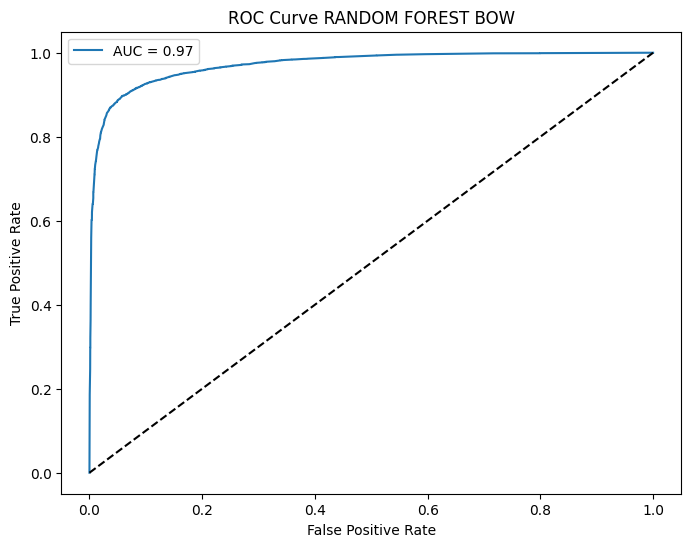

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest Classifier for Bag of Words representation
rf_bow = RandomForestClassifier()

# Train the model
rf_bow.fit(X_train_bow, y_train)

# Make predictions on the test set for Bag of Words representation
rfcpreds_bow = rf_bow.predict(X_test_bow)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfcpreds_bow)
recall = recall_score(y_test, rfcpreds_bow)
f1 = f1_score(y_test, rfcpreds_bow)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfcpreds_bow)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_rfb = rf_bow.predict_proba(X_test_bow)
fpr_rfb, tpr_rfb, thresholds_rfb = roc_curve(y_test_bin.ravel(), predict_proba_rfb[:, 1])
roc_auc = auc(fpr_rfb, tpr_rfb)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rfb, tpr_rfb, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RANDOM FOREST BOW')
plt.legend()
plt.show()


## RANDOM FOREST TF-IDF

Precision: 0.932258064516129
Recall: 0.8888661062128358
F1-score: 0.9100451348798152
Confusion Matrix:
[[6157  315]
 [ 542 4335]]
AUC: 0.9747355400199671


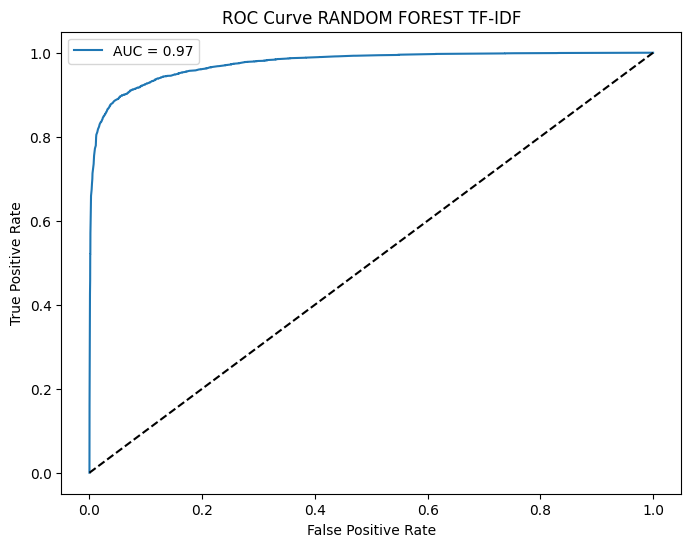

In [ ]:
# Create an instance of Random Forest Classifier for TF-IDF representation
rf_tfidf = RandomForestClassifier()

# Train the model
rf_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the test set for  TF-IDF representation
rfcpreds_tfid = rf_tfidf.predict(X_test_tfidf)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfcpreds_tfid)
recall = recall_score(y_test, rfcpreds_tfid)
f1 = f1_score(y_test, rfcpreds_tfid)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfcpreds_tfid)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_rft = rf_tfidf.predict_proba(X_test_tfidf)
fpr_rft, tpr_rft, thresholds_rft = roc_curve(y_test_bin.ravel(), predict_proba_rft[:, 1])
roc_auc = auc(fpr_rft, tpr_rft)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rft, tpr_rft, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RANDOM FOREST TF-IDF')
plt.legend()
plt.show()



## NAIVE BAYES BAG OF WORDS

Precision: 0.8616232655388709
Recall: 0.929464834939512
F1-score: 0.894259222726376
Confusion Matrix:
[[5744  728]
 [ 344 4533]]
AUC: 0.9708899020984196


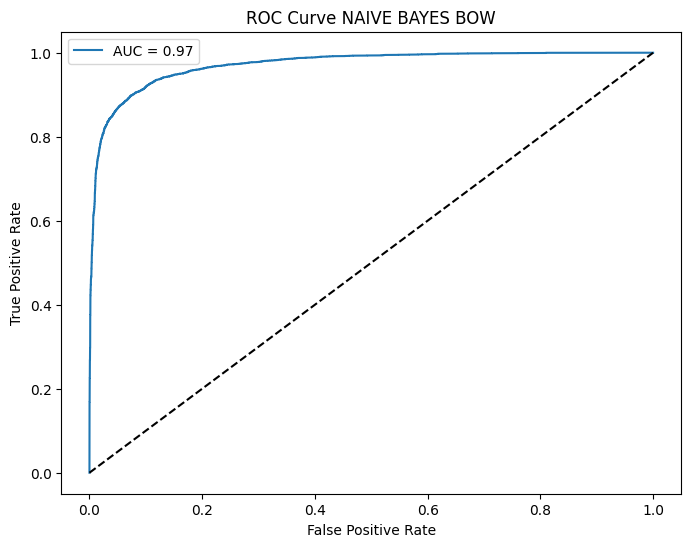

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
nb_bow = MultinomialNB()

# Train the model
nb_bow.fit(X_train_bow, y_train)

# Make predictions on the test set for Bag of Words representation
predictions_bow = nb_bow.predict(X_test_bow)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_bow)
recall = recall_score(y_test, predictions_bow)
f1 = f1_score(y_test, predictions_bow)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_bow)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_nbb = nb_bow.predict_proba(X_test_bow)
fpr_nbb, tpr_nbb, thresholds_nbb = roc_curve(y_test_bin.ravel(), predict_proba_nbb[:, 1])
roc_auc = auc(fpr_nbb, tpr_nbb)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nbb, tpr_nbb, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NAIVE BAYES BOW')
plt.legend()
plt.show()



Precision: 0.8927602754016274
Recall: 0.8773836374820586
F1-score: 0.885005170630817
Confusion Matrix:
[[5958  514]
 [ 598 4279]]
AUC: 0.9643350019883447


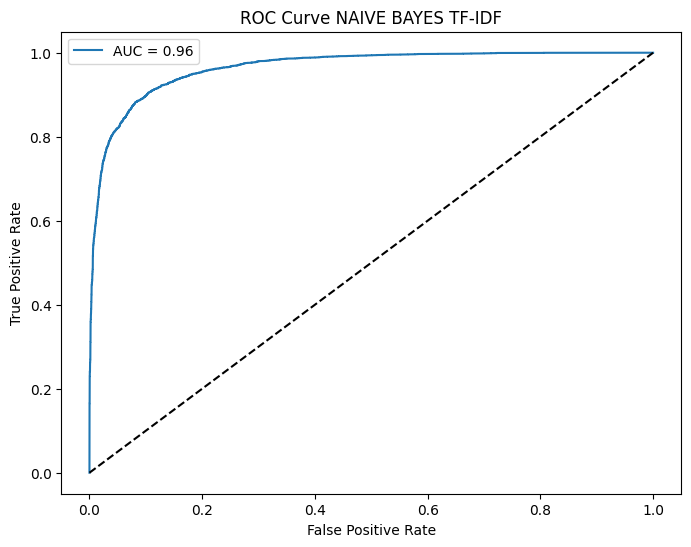

In [ ]:
nb_tf = MultinomialNB()

# Train the model
nb_tf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
preds_tf = nb_tf.predict( X_test_tfidf)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, preds_tf)
recall = recall_score(y_test, preds_tf)
f1 = f1_score(y_test, preds_tf)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, preds_tf)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_nbt = nb_tf.predict_proba(X_test_tfidf)
fpr_nbt, tpr_nbt, thresholds_nbt = roc_curve(y_test_bin.ravel(), predict_proba_nbt[:, 1])
roc_auc = auc(fpr_nbt, tpr_nbt)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nbt, tpr_nbt, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NAIVE BAYES TF-IDF')
plt.legend()
plt.show()

## KNN BAG OF WORDS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 10)

rcv_knn = RandomizedSearchCV(knn_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(X_train_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
rcv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'cosine'}

In [ ]:
rcv_knn.best_score_

0.8867520791418088

In [ ]:
finalmodel_knn_bow = knn_bow.set_params(**rcv_knn.best_params_)
finalmodel_knn_bow.fit(X_train_bow, y_train)
knnpreds_bow = finalmodel_knn_bow.predict(X_test_bow)

Precision: 0.886054054054054
Recall: 0.8402706581915111
F1-score: 0.8625552515259944
Confusion Matrix:
[[5945  527]
 [ 779 4098]]
AUC: 0.9461892499872641


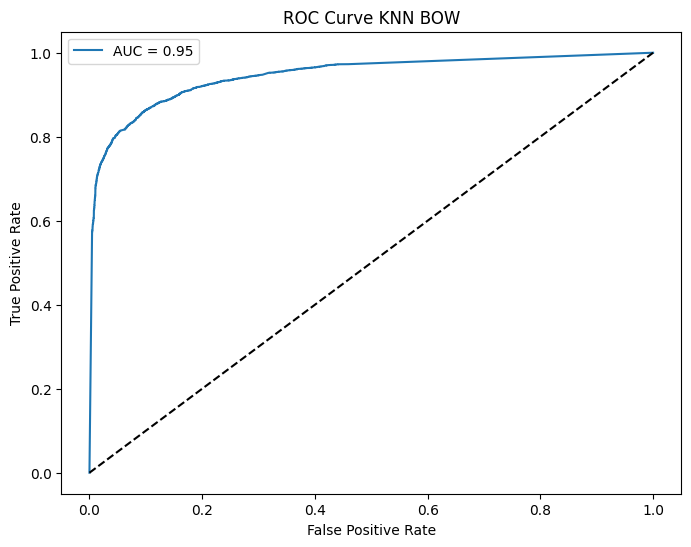

In [ ]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_bow)
recall = recall_score(y_test, knnpreds_bow)
f1 = f1_score(y_test, knnpreds_bow)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_bow)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_knnb = finalmodel_knn_bow.predict_proba(X_test_bow)
fpr_knnb, tpr_knnb, thresholds_knnb = roc_curve(y_test_bin.ravel(), predict_proba_knnb[:, 1])
roc_auc = auc(fpr_knnb, tpr_knnb)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knnb, tpr_knnb, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN BOW')
plt.legend()
plt.show()

## KNN TF-IDF

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 10)

rcv_knn_tf = RandomizedSearchCV(knn_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn_tf.fit(X_train_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
rcv_knn_tf.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'metric': 'cosine'}

In [ ]:
rcv_knn_tf.best_score_

0.8806722404845718

In [ ]:
finalmodel_knn_tf = knn_bow.set_params(**rcv_knn_tf.best_params_)
finalmodel_knn_tf.fit(X_train_tfidf, y_train)
knnpreds_tf = finalmodel_knn_tf.predict(X_test_tfidf)

Precision: 0.8259728902492348
Recall: 0.7746565511584991
F1-score: 0.7994921172362712
Confusion Matrix:
[[5676  796]
 [1099 3778]]
AUC: 0.9104654031828214


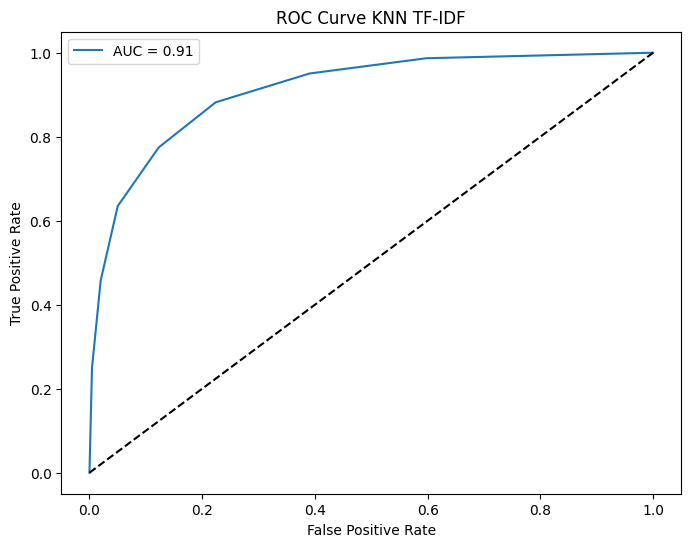

In [ ]:

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_tf)
recall = recall_score(y_test, knnpreds_tf)
f1 = f1_score(y_test, knnpreds_tf)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, knnpreds_tf)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_knntf = finalmodel_knn_tf.predict_proba(X_test_tfidf)
fpr_knntf, tpr_knntf, thresholds_knntf = roc_curve(y_test_bin.ravel(), predict_proba_knntf[:, 1])
roc_auc = auc(fpr_knntf, tpr_knntf)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knntf, tpr_knntf, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN TF-IDF')
plt.legend()
plt.show()

## SVM BAG OF WORDS

Precision: 0.962670994667285
Recall: 0.851343038753332
F1-score: 0.9035908596300327
Confusion Matrix:
[[6311  161]
 [ 725 4152]]
AUC: 0.9725657699810898


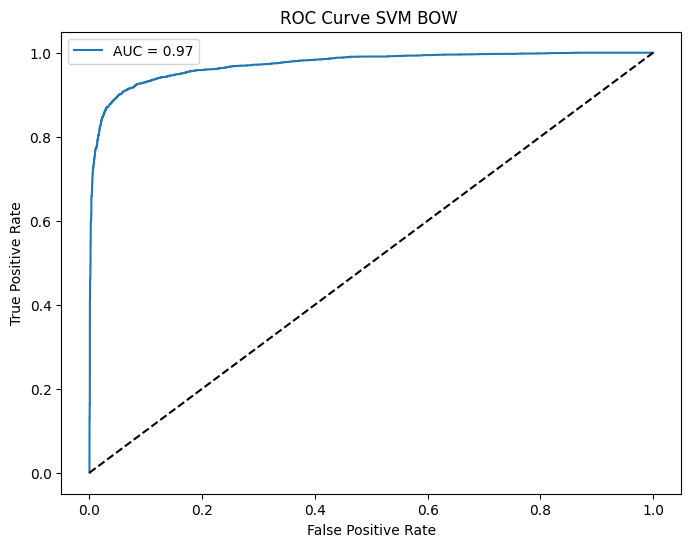

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Create an instance of Support Vector Machine Classifier (SVC) for Bag of Words representation
svm_bow = SVC(probability = True)

# Train the model
svm_bow.fit(X_train_bow, y_train)

# Make predictions on the test set for Bag of Words representation
predictions_bow = svm_bow.predict(X_test_bow)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_bow)
recall = recall_score(y_test, predictions_bow)
f1 = f1_score(y_test, predictions_bow)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_bow)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_svmb = svm_bow.predict_proba(X_test_bow)
fpr_svmb, tpr_svmb, thresholds_svmb = roc_curve(y_test_bin.ravel(), predict_proba_svmb[:, 1])
roc_auc = auc(fpr_svmb, tpr_svmb)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svmb, tpr_svmb, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM BOW ')
plt.legend()
plt.show()

## SVM TF-IDF

Precision: 0.9635188178249827
Recall: 0.8556489645273734
F1-score: 0.9063857515204171
Confusion Matrix:
[[6314  158]
 [ 704 4173]]
AUC: 0.9399292433163613


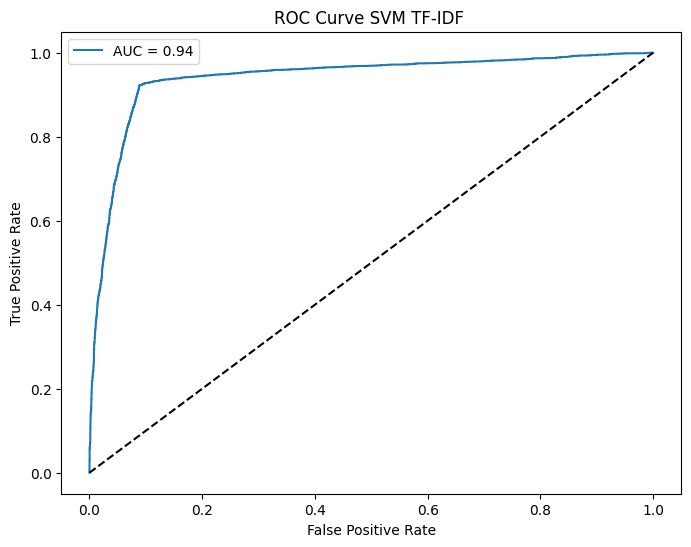

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


# Create an instance of Support Vector Machine Classifier (SVC) for Bag of Words representation
svm_tf = SVC(probability = True)

# Train the model
svm_tf.fit(X_train_tfidf, y_train)

# Make predictions on the test set for Bag of Words representation
predictions_tf = svm_tf.predict(X_test_tfidf)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_tf)
recall = recall_score(y_test, predictions_tf)
f1 = f1_score(y_test, predictions_tf)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions_tf)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#AUC
y_test_bin = label_binarize(y_test, classes=[0, 1])  # For binary classification

# Predict probabilities using the trained classifier
predict_proba_svmtf = svm_tf.predict_proba(X_test_bow)
fpr_svmtf, tpr_svmtf, thresholds_svmtf = roc_curve(y_test_bin.ravel(), predict_proba_svmtf[:, 1])
roc_auc = auc(fpr_svmtf, tpr_svmtf)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svmtf, tpr_svmtf, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM TF-IDF ')
plt.legend()
plt.show()